In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

import pandas as pd

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat('INTC_20141114.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-4
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [5]:
microprice_series = pd.Series(microprice)
microprice_series.describe()

count    234000.000000
mean         33.850649
std           0.087420
min          33.360909
25%          33.825162
50%          33.879352
75%          33.908322
max          33.966439
dtype: float64

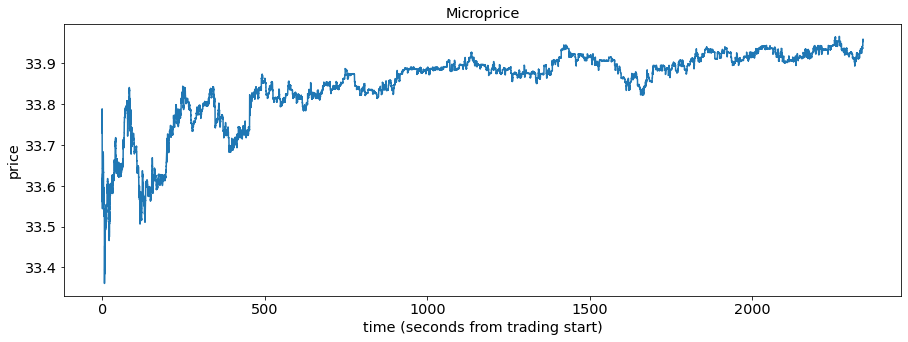

In [6]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [7]:
midprice_series = pd.Series(midprice)
midprice_series.describe()

count    234000.000000
mean         33.850358
std           0.087394
min          33.360000
25%          33.825000
50%          33.875000
75%          33.905000
max          33.965000
dtype: float64

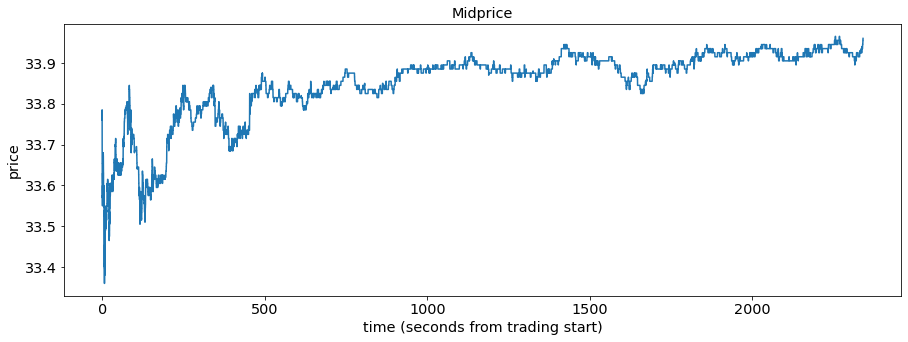

In [8]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

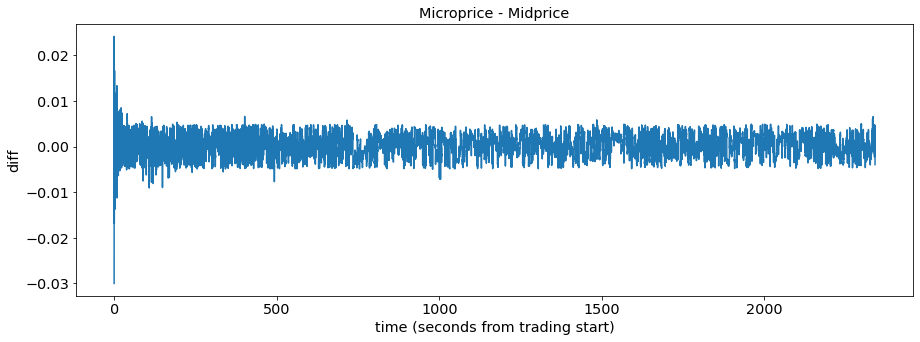

In [9]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [10]:
spread_series = pd.Series(spread)
spread_series.describe()

count    234000.000000
mean          0.010232
std           0.001982
min           0.010000
25%           0.010000
50%           0.010000
75%           0.010000
max           0.150000
dtype: float64

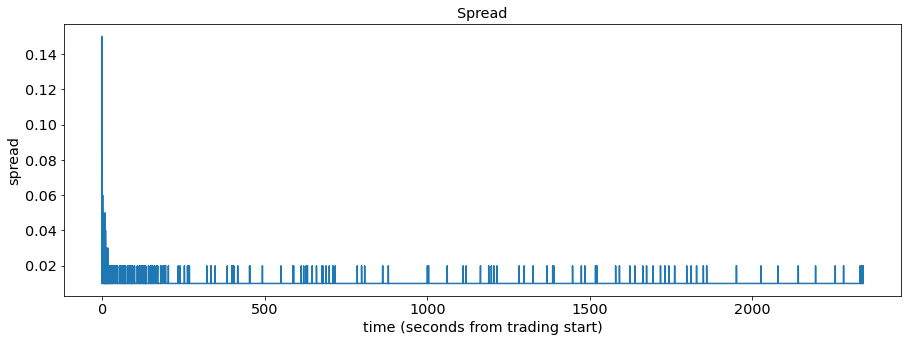

In [11]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

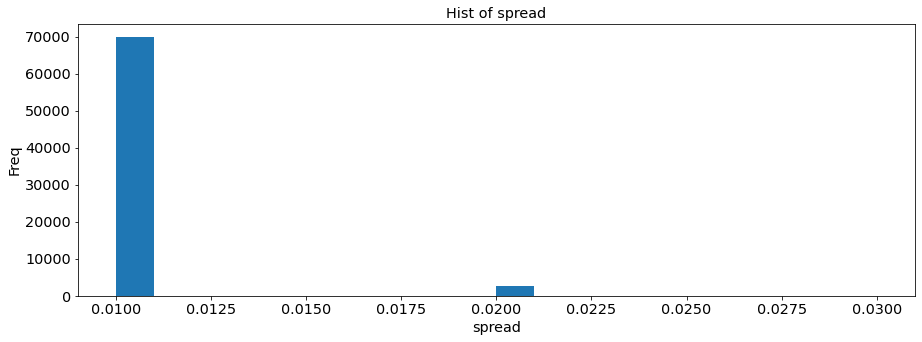

In [12]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

In [13]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

In [14]:
rho_series = pd.Series(rho.ravel())
rho_series.describe()

count    234000.000000
mean          0.058324
std           0.445331
min          -0.992530
25%          -0.255064
50%           0.060729
75%           0.402678
max           0.991033
dtype: float64

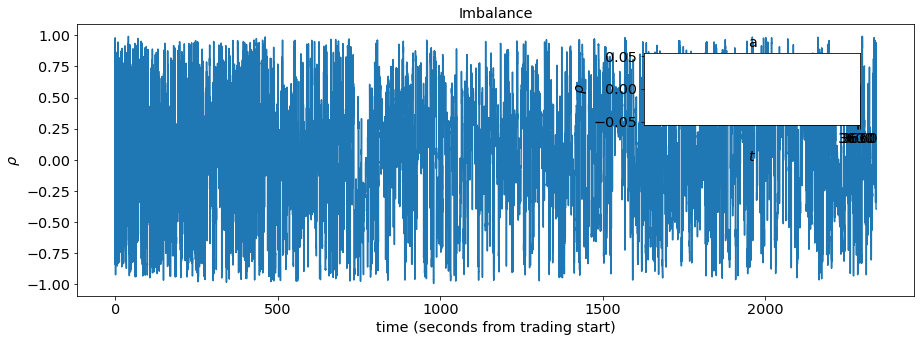

In [15]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

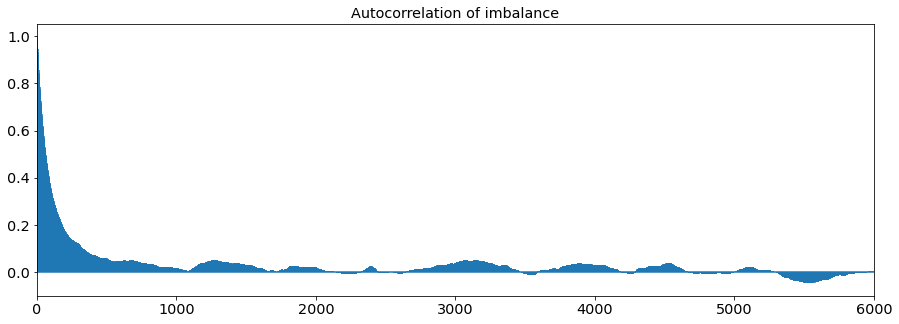

In [16]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

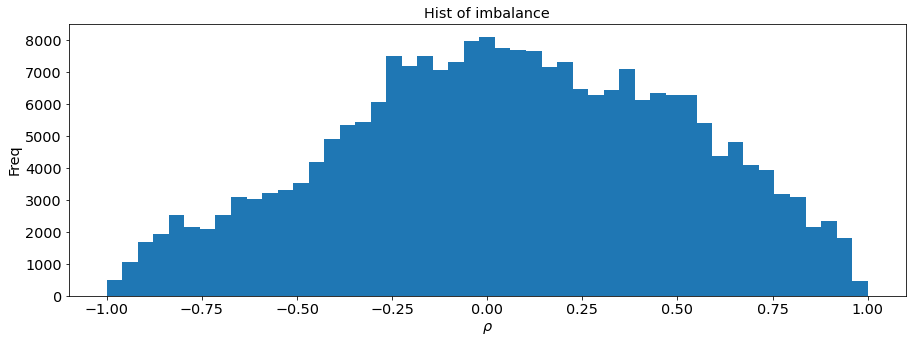

In [17]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [18]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

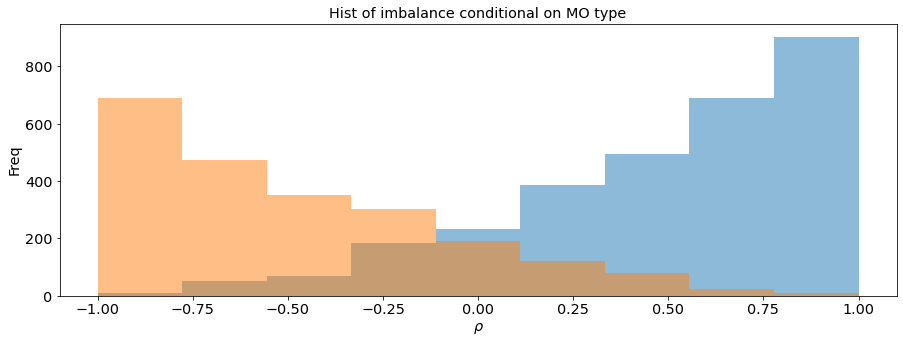

In [19]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()